In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm

In [2]:
info = pd.read_csv("../csvs/resonant/Gaussian_Fits_317.csv")
info.head()

,ID,Probability,Mean,Sigma,Mean_Error,Sigma_Error,Determinant
0,0.0,0.477081,3.787575,3.756347e-01,0.016731,0.012379,4.282621e-08
1,1.0,inf,8.000000,6.408911e-54,inf,inf,inf
2,2.0,inf,8.000000,2.259911e-52,inf,inf,inf
3,3.0,0.591132,6.837504,3.065434e-01,0.013839,0.009772,1.828421e-08
4,4.0,0.763205,5.687568,2.398376e-01,0.010566,0.007649,6.523258e-09


In [4]:
significance_scores = pd.read_csv("../csvs/resonant/res_signficance_scores_new_scipy.csv")
significance_scores.head()

,ID,Anderson_P,KS_P
0,3.0,0.2500,0.718919
1,4.0,0.0010,0.000061
2,5.0,0.2500,0.960301
3,8.0,0.2500,0.718919
4,13.0,0.0041,0.000108


In [5]:
ranked_scores = significance_scores.sort_values("KS_P", ascending=False)
ranked_scores.head()

,ID,Anderson_P,KS_P
59,121.0,0.25,0.960301
2,5.0,0.25,0.960301
15,31.0,0.25,0.960301
45,84.0,0.25,0.960301
72,159.0,0.25,0.935112


In [6]:
def plot_random_hists( planet_systems,title=None):
    ncol, nrow = 3,len(planet_systems)//3
    if (len(planet_systems)%3 != 0):
        nrow +=1
    fig, axarr = plt.subplots(ncols=ncol,nrows=nrow)
    fig.set_size_inches((15, nrow*3))
    for jj , planet_sys in enumerate(planet_systems[:ncol*nrow]):
        data = pd.read_csv("../csvs/resonant/resonant_features/" + planet_sys, index_col=0)
    
        data = data[data["t"]<1e8]
        data["logt"] = np.log10(data["t"])
        name = planet_sys.split("_")[2]
        # make guassian
        mean, sigma =  info[info["ID"]==int(name)][["Mean", "Sigma"]].values[0]

        x = np.linspace(mean - sigma*4, mean+sigma*4, 100)
        rv = norm(loc = mean, scale = sigma)
        axarr[jj//ncol, jj%ncol ].plot(x, rv.pdf(x), linewidth = 4, color = "black")
        data.hist("logt",  ax = axarr[jj//ncol, jj%ncol],  label = name + " Mean - " +str("{0:.3f}".format(mean)) + " Sigma - "+ str("{0:.3f}".format(sigma)), alpha = 0.7, normed = 1, color = "purple", edgecolor = "black", bins = 20)
        axarr[jj//ncol, jj%ncol ].set_title(name + r': $\mu$=' +str("{0:.3f}".format(mean)) + r': $\sigma$='+ str("{0:.3f}".format(sigma)))
    plt.show()

['Res_sys_5_500.csv', 'Res_sys_31_500.csv', 'Res_sys_84_500.csv', 'Res_sys_159_500.csv', 'Res_sys_27_500.csv', 'Res_sys_93_500.csv']


/home/naireen/Documents/pythonVirtualEnvs/ROB501/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:412: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(data[col].dropna().values, bins=bins, **kwds)


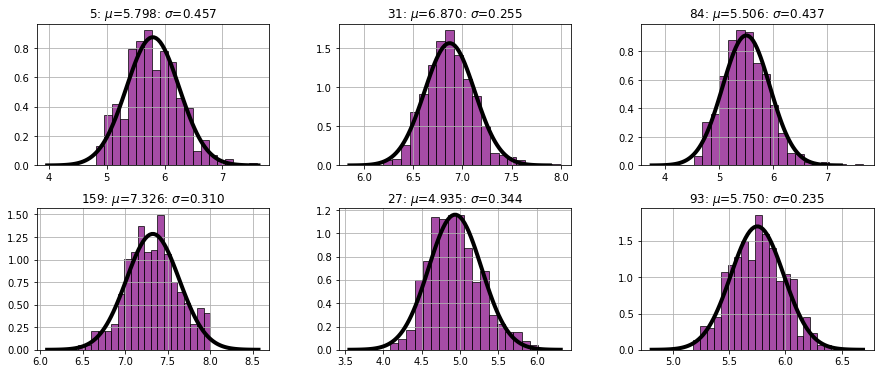

In [7]:
very_gaussian = ranked_scores.head(7)["ID"]
very_gaussian = ["Res_sys_{0}_500.csv".format(int(x))  for x in very_gaussian][1:]
print (very_gaussian)
plot_random_hists(very_gaussian)